In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop,SGD
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.utils import validation
from sklearn import preprocessing
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [ ]:
training=train_datagen.flow_from_directory('/content/drive/MyDrive/Nhandiencagiong/train',target_size=(150,150),batch_size=20,class_mode="categorical")

Found 800 images belonging to 4 classes.


In [ ]:
test=train_datagen.flow_from_directory('/content/drive/MyDrive/Nhandiencagiong/test',target_size=(150,150),batch_size=20,class_mode="categorical")

Found 40 images belonging to 4 classes.


In [ ]:
model=Sequential() 
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 69, 69, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                  

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(training,batch_size=32,epochs=100,verbose=1,validation_data=test,callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
40/40 [==============================] - 19s 442ms/step - loss: 2.1580 - accuracy: 0.3913 - val_loss: 0.6189 - val_accuracy: 0.7250
Epoch 2/100
40/40 [==============================] - 17s 429ms/step - loss: 0.6808 - accuracy: 0.6975 - val_loss: 0.5173 - val_accuracy: 0.8250
Epoch 3/100
40/40 [==============================] - 17s 428ms/step - loss: 0.5706 - accuracy: 0.7688 - val_loss: 0.2647 - val_accuracy: 0.8750
Epoch 4/100
40/40 [==============================] - 17s 432ms/step - loss: 0.5540 - accuracy: 0.7937 - val_loss: 0.2192 - val_accuracy: 0.9750
Epoch 5/100
40/40 [==============================] - 19s 472ms/step - loss: 0.3631 - accuracy: 0.8700 - val_loss: 0.8699 - val_accuracy: 0.7250
Epoch 6/100
40/40 [==============================] - 17s 427ms/step - loss: 0.3279 - accuracy: 0.8750 - val_loss: 0.1141 - val_accuracy: 0.9750
Epoch 7/100
40/40 [==============================] - 17s 431ms/step - loss: 0.2201 - accuracy: 0.9375 - val_loss: 0.1623 - val_accuracy:

In [ ]:
Score=model.evaluate(training,verbose=0)
print('Test Loss', Score[0])
print('Test Accuracy', Score[1])

Test Loss 0.08602430671453476
Test Accuracy 0.9850000143051147


In [ ]:
cd '/content/drive/MyDrive/Nhandiencagiong'

/content/drive/MyDrive/Nhandiencagiong


<function matplotlib.pyplot.show>

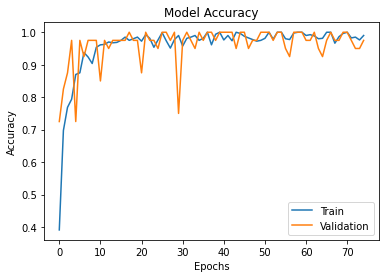

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save('nhandiencagiong.h5')

In [ ]:
model_nhandien=load_model('/content/drive/MyDrive/Nhandiencagiong/nhandiencagiong.h5')

In [ ]:
training.class_indices

{'cabop': 0, 'cachep': 1, 'catre': 2, 'khongcoca': 3}

Ca Tre


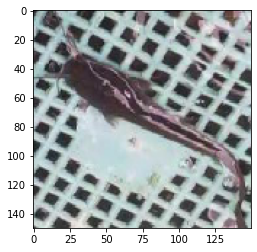

In [ ]:
img=load_img('/content/drive/MyDrive/Nhandiencagiong/test/catre/catre201.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_nhandien.predict(img),axis=1)
if a[0]==0:
  print('Ca Bop')
if a[0]==1:
  print('Ca Chep')
if a[0]==2:
  print('Ca Tre')
if a[0]==3:
  print('Khong Co Ca')

Ca Chep


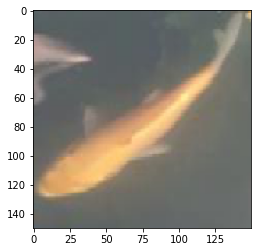

In [ ]:
img=load_img('/content/drive/MyDrive/Nhandiencagiong/test/cachep/cachep201.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_nhandien.predict(img),axis=1)
if a[0]==0:
  print('Ca Bop')
if a[0]==1:
  print('Ca Chep')
if a[0]==2:
  print('Ca Tre')
if a[0]==3:
  print('Khong Co Ca')

Ca Bop


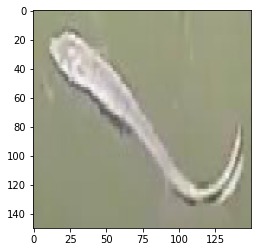

In [ ]:
img=load_img('/content/drive/MyDrive/Nhandiencagiong/test/cabop/cabop201.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_nhandien.predict(img),axis=1)
if a[0]==0:
  print('Ca Bop')
if a[0]==1:
  print('Ca Chep')
if a[0]==2:
  print('Ca Tre')
if a[0]==3:
  print('Khong Co Ca')

Khong Co Ca


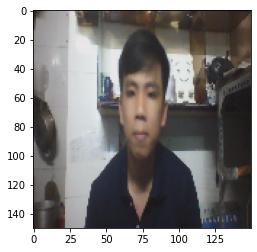

In [ ]:
img=load_img('/content/drive/MyDrive/Nhandiencagiong/test/khongcoca/KHONGCOCA_0403.png',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_nhandien.predict(img),axis=1)
if a[0]==0:
  print('Ca Bop')
if a[0]==1:
  print('Ca Chep')
if a[0]==2:
  print('Ca Tre')
if a[0]==3:
  print('Khong Co Ca')